# Картинка 2.1

In [1]:
import pandas as pd
import neuro_lib

file = r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\0-2020-12_04_16-17-57.txt"

param_str = [3.3, 68000] # Параметры структуры: V(В) пит., R(Ом) доп.

neuro_lib.replace (file)
neuro_lib.replace (file, '         ', '\t')

data = pd.read_csv(file, header=None, sep = "\t")
print (data, '\n')

             0         1
0            6  0.041625
1          206  0.041625
2          406  0.041500
3          606  0.041500
4          807  0.041500
...        ...       ...
46638  7479950  0.676125
46639  7480150  0.675875
46640  7480350  0.675625
46641  7480550  0.676250
46642  7480750  0.676375

[46643 rows x 2 columns] 



In [2]:
import neuro_lib_2
import numpy as np

i = 0
res_on_off = neuro_lib_2.on_off_impulse(file)
print (res_on_off.head().to_string())

x_led = np.array([0, res_on_off['off_end_t'][0],
                  res_on_off['on_start_t'][1], res_on_off['on_end_t'][1],
                  res_on_off['off_start_t'][1], res_on_off['off_end_t'][1],
                  res_on_off['on_start_t'][2], res_on_off['on_end_t'][2],
                  res_on_off['off_start_t'][2], res_on_off['off_end_t'][2],
                  res_on_off['on_start_t'][3], res_on_off['on_end_t'][3],
                  res_on_off['off_start_t'][3], res_on_off['off_end_t'][3],
                  res_on_off['on_start_t'][4], res_on_off['on_end_t'][4],
                  res_on_off['off_start_t'][4], 2000])
print (x_led)
print (x_led.shape)

   N on_start_t on_start_V on_end_t on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN      NaN         NaN         NaN   100.153   0.04125
1  1    100.379     0.0635  120.375   0.8185     120.395    0.783125   145.403   0.69125
2  2    145.435     0.7475  165.435    1.181     165.458     1.15575   190.465   1.04688
3  3    190.498    1.10712    210.5    1.412     210.521     1.39562   235.523   1.28412
4  4    235.555      1.334  255.557  1.58163     255.578     1.56012       NaN       NaN
[   0.     100.153  100.379  120.375  120.395  145.403  145.435  165.435
  165.458  190.465  190.498  210.5    210.521  235.523  235.555  255.557
  255.578 2000.   ]
(18,)


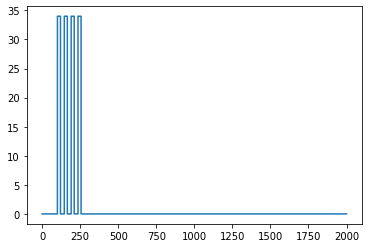

In [3]:
intesity = 34
y_led = np.array([0, 0,
                  intesity, intesity,
                  0, 0,
                  intesity, intesity,
                  0, 0,
                  intesity, intesity,
                  0, 0,
                  intesity, intesity,
                  0, 0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_led, y_led)

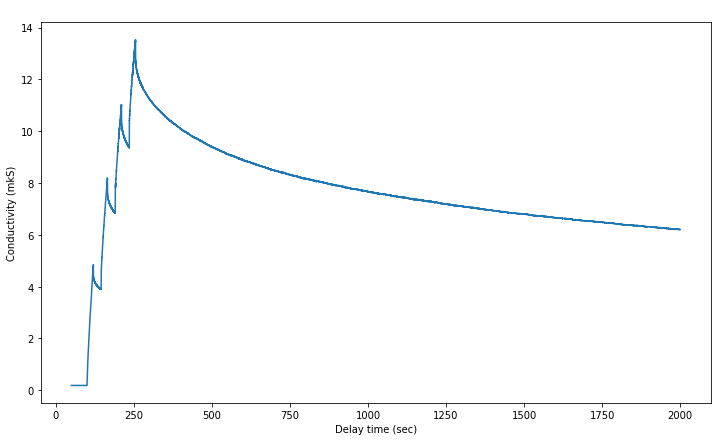

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

time_min = 50
time_max = 2000

x_msec = data[0].drop(data[(data[0] < time_min*1000) | (data[0] > time_max*1000)].index)
x = x_msec/1000
y_volts = data[1].drop(data[(data[0] < time_min*1000) | (data[0] > time_max*1000)].index)
y = 1/((param_str[0] - y_volts)*param_str[1]/y_volts) * 1000000

plt.figure(figsize=(12, 7))
plt.title("  ")
#plt.scatter(x, y, s = 2)
plt.plot(x, y)
plt.xlabel("Delay time (sec)")
plt.ylabel("Conductivity (mkS)")
#plt.axis([-5, 520, 1.15, 1.215])
#plt.text(-100, 1.42, r'$*10^5$')

plt.show()

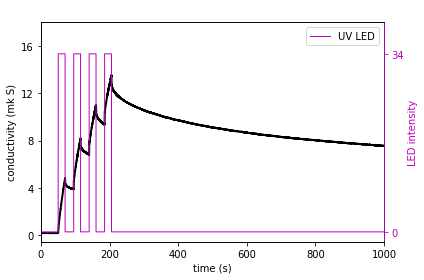

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(x-50, y, 'b-', color = 'k', linewidth = 2, label = 'ZnO')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('conductivity (mk S)', color='k')
ax1.tick_params('y', colors='k')
plt.ylim(top = 18, bottom = -0.55)
plt.yticks(np.arange(0, 20, 4))

ax2 = ax1.twinx()
ax2.plot(x_led-50, y_led, '-', color = 'm', linewidth = 1, label = 'UV LED')
ax2.set_ylabel('LED intensity', color='m')
ax2.tick_params('y', colors='m')
plt.ylim(top = 40, bottom = -1.9)
plt.yticks(np.arange(0, 35, max(y_led)))
plt.xlim(0, 1000)
ax2.spines['right'].set_color('m')
plt.title('  ')
plt.legend()

fig.tight_layout()
plt.show()

# Картинка 2.2

In [6]:
import neuro_lib    # Импорт своей библиотеки для работы с Neuro обработкой файлов

file = r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\2020-11_25_11-35-23.txt"

param_str = [3.3, 68000] # Параметры структуры: V(В) пит., R(Ом) доп.

neuro_lib.replace (file)
neuro_lib.replace (file, '         ', '\t')
print (param_str)

import numpy as np
import pandas as pd

data_2_min = pd.read_csv(file, header=None, sep = "\t")
print (data_2_min, '\n')

[3.3, 68000]
               0         1
0             11  0.325125
1            211  0.324750
2            412  0.324875
3            612  0.325000
4            812  0.325375
...          ...       ...
865287  43519853  0.336125
865288  43520053  0.335750
865289  43520253  0.335625
865290  43520454  0.335500
865291  43520654  0.335750

[865292 rows x 2 columns] 



C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


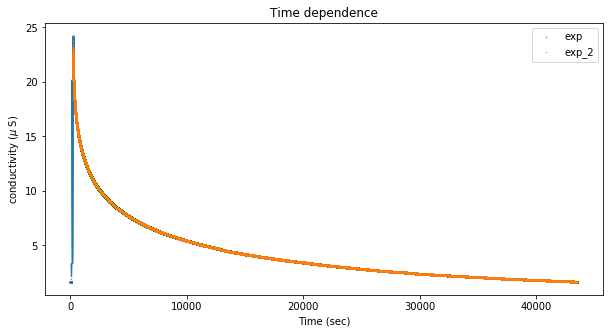

In [7]:
import matplotlib.pyplot as plt

x_1 = data_2_min[0]/1000
y_1 = 1/((param_str[0] - data_2_min[1])*param_str[1]/data_2_min[1])*1000000

plt.rcParams['figure.figsize'] = (10, 5)  # Размер картинок
plt.title("Time dependence")

plt.plot()
plt.scatter(x_1, y_1, s=0.2, label = 'exp')
index_max = np.argmax(y_1)
plt.scatter(x_1[index_max:], y_1[index_max:], s=0.2, label = 'exp_2')
#plt.yscale('log')                    #логорифмический масштаб оси Y
plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel('conductivity ($\mu$ S)')
#plt.axis([0, 40, 0, 0.01])

plt.show()

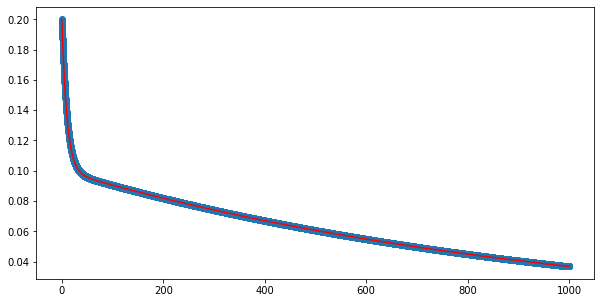

[9.99999986e-02 1.00000000e-01 9.99999978e+02 9.99999997e+00
 1.48372343e-09] 
 [1.91208491e-12 1.31808780e-11 1.24839321e-07 2.00555899e-09
 4.10758198e-12]


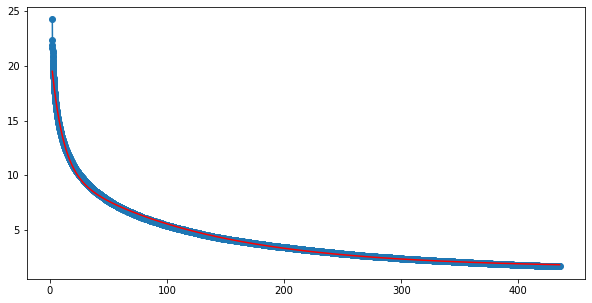

[ 11.33235116   9.05872699   9.69534234 122.0890023    1.56828682] 
 [0.03364378 0.01286325 0.04926515 0.36541616 0.00563669]


In [8]:
import matplotlib.pyplot as plt
import math
from scipy import optimize

def func(x, a1, a2, t1, t2, c):
    return (a1*np.exp(-x/t1) + a2*np.exp(-x/t2) + c)

xdata = np.linspace(0, 1000, 10000)
ydata = func(xdata, 0.1, 0.1, 10, 1000, 0)
#print (xdata)

popt, pcov = optimize.curve_fit(func, xdata, ydata)
plt.plot(xdata, ydata, 'o-')
plt.plot(xdata, func(xdata, *popt), 'r-')
plt.show()
perr = np.sqrt(np.diag(pcov))
print (popt, '\n', perr)

fit_x = np.array(x_1[index_max::100])/100
fit_y = np.array(y_1[index_max::100])
#print (fit_x, '\n', fit_y)

popt, pcov = optimize.curve_fit(func, fit_x, fit_y)
plt.plot(fit_x, fit_y, 'o-')
plt.plot(fit_x, func(fit_x, *popt), 'r-')
plt.show()
perr = np.sqrt(np.diag(pcov))
print (popt, '\n', perr)

## Картинка 2.2 v2

In [9]:
import neuro_lib    # Импорт своей библиотеки для работы с Neuro обработкой файлов

file = r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\2020-12_09_19-09-24.txt"

param_str = [3.3, 68000] # Параметры структуры: V(В) пит., R(Ом) доп.

neuro_lib.replace (file)
neuro_lib.replace (file, '         ', '\t')
print (param_str)

import numpy as np
import pandas as pd

data_2_v2_min = pd.read_csv(file, header=None, sep = "\t")
print (data_2_v2_min, '\n')

[3.3, 68000]
               0         1
0              6  0.016000
1           1006  0.016000
2           2007  0.016250
3           3007  0.016000
4           4007  0.016125
...          ...       ...
119640  74407265  0.241750
119641  74408266  0.241625
119642  74409266  0.241875
119643  74410267  0.242375
119644  74411267  0.242250

[119645 rows x 2 columns] 



C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


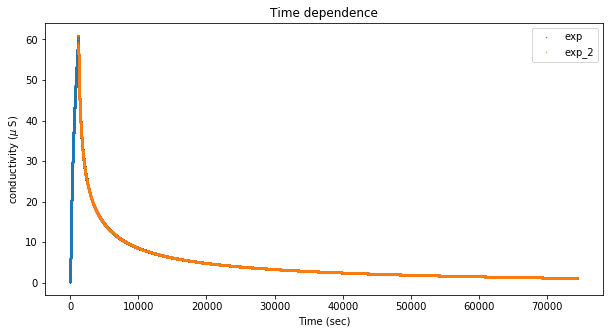

In [10]:
import matplotlib.pyplot as plt

x_1_v2 = data_2_v2_min[0]/1000
y_1_v2 = 1/((param_str[0] - data_2_v2_min[1])*param_str[1]/data_2_v2_min[1])*1000000

plt.rcParams['figure.figsize'] = (10, 5)  # Размер картинок
plt.title("Time dependence")

plt.plot()
plt.scatter(x_1_v2, y_1_v2, s=0.2, label = 'exp')
index_max = np.argmax(y_1_v2)
plt.scatter(x_1_v2[index_max:], y_1_v2[index_max:], s=0.2, label = 'exp_2')
#plt.yscale('log')                    #логорифмический масштаб оси Y
plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel('conductivity ($\mu$ S)')
#plt.axis([0, 40, 0, 0.01])

plt.show()

## Картинка 2 v3

In [11]:
import neuro_lib    # Импорт своей библиотеки для работы с Neuro обработкой файлов

file = r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\2020-11_03_16-06-35.txt"

param_str = [3.3, 68000] # Параметры структуры: V(В) пит., R(Ом) доп.

import numpy as np
import pandas as pd

data_2_v3_min = pd.read_csv(file, header=None, sep = "\t")
print (data_2_v3_min, '\n')

               0         1
0              5  0.016375
1           1005  0.016875
2           2005  0.016375
3           3005  0.016875
4           4005  0.016500
...          ...       ...
107998  50498557  0.052000
107999  50499557  0.052250
108000  50500557  0.052375
108001  50501557  0.052125
108002  50502557  0.052875

[108003 rows x 2 columns] 



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


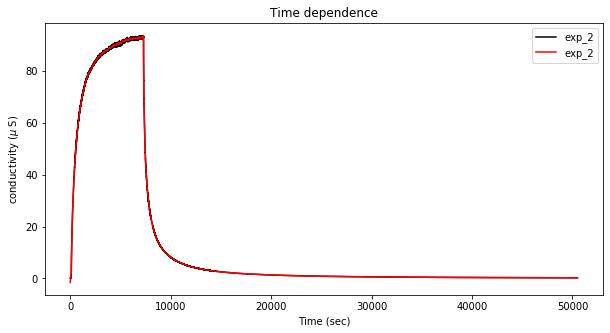

7270.075


In [12]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
from scipy.signal import savgol_filter

x_1_v3 = data_2_v3_min[0]/1000
y_1_v3 = 1/((param_str[0] - data_2_v3_min[1])*param_str[1]/data_2_v3_min[1])*1000000
index_max = np.argmax(y_1_v3)
yhat_1 = savgol_filter(y_1_v3[:index_max], 201, 1) # window size 51, polynomial order 3 ---- сглаживание кривой
yhat_2 = savgol_filter(y_1_v3[index_max:], 101, 5)
yhat = np.concatenate((yhat_1,yhat_2), axis=0)

plt.rcParams['figure.figsize'] = (10, 5)  # Размер картинок
plt.title("Time dependence")
plt.xlabel("Time (sec)")
plt.ylabel('conductivity ($\mu$ S)')

plt.plot(x_1_v3, y_1_v3, label = 'exp_2', color = 'k')
plt.plot(x_1_v3, yhat, label = 'exp_2', color = 'r')    #вывод тольок релаксационной кривой
plt.legend()
plt.show()
print (x_1_v3[index_max])

## Картинка 2.3

      0         1
0     5  0.371875
1   505  0.371875
2  1005  0.372000
3  1505  0.371875
4  2006  0.370875
      0         1
0     6  0.368250
1   506  0.368125
2  1006  0.368250
3  1506  0.368000
4  2006  0.367875
      0         1
0     6  0.360625
1   506  0.360375
2  1006  0.360625
3  1506  0.360000
4  2006  0.360125
6


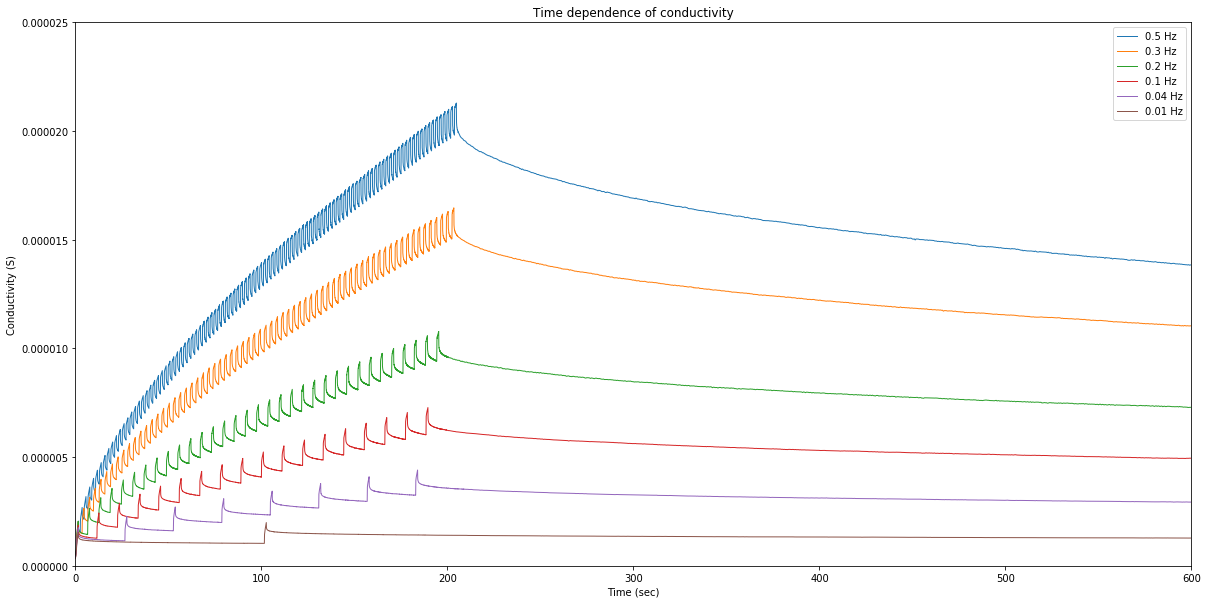

In [13]:
import neuro_lib    # Импорт своей библиотеки для работы с Neuro обработкой файлов
import pandas as pd
import numpy as np

file_2_3 = [r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\2-2020-11_28_15-24-13.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\3-2020-11_29_03-27-50.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\4-2020-11_29_15-31-26.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\5-2020-11_30_03-34-57.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\6-2020-11_30_15-38-28.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\8-2020-12_01_15-45-42.txt"]

param_str = [3.3, 68000] # Параметры структуры: V(В) пит., R(Ом) доп.
data_2_3 = [pd.read_csv(i, header=None, sep = "\t") for i in file_2_3]

for j in range(0,3):
    print (data_2_3[j].head().to_string())
print (len(data_2_3))

import matplotlib.pyplot as plt

x_2_3 = list(data_2_3[0][0])
y_2_3 = list(data_2_3[0][1])

popravka_2_3 = [-0.0000005,
            -0.0000005,
            -0.0000004,
            -0.0000002,
            0.00000002,
            0.00000067]

for i in range(0, len(data_2_3)):
    x_2_3[i] = list(data_2_3[i][0]/1000 - 10)
    y_2_3[i] = 1/((param_str[0] - data_2_3[i][1])*param_str[1]/data_2_3[i][1]) + popravka_2_3[i] - 0.000001

My_lable_2_3 = ['1000_ms-1000_ms', # 0.5 Hz
            '1000_ms-2000_ms',     # 0.33 Hz
            '1000_ms-5000_ms',     # 0.17 Hz
            '1000_ms-10000_ms',    # 0.09 Hz
            '1000_ms-25000_ms',    # 0.038 Hz
            '1000_ms-100000_ms']   # 0.01 Hz

My_lable_2_3 = ['0.5 Hz', # 0.5 Hz
            '0.3 Hz',     # 0.33 Hz
            '0.2 Hz',     # 0.17 Hz
            '0.1 Hz',    # 0.09 Hz
            '0.04 Hz',    # 0.038 Hz
            '0.01 Hz']   # 0.01 Hz

plt.rcParams['figure.figsize'] = (20, 10)  # Размер картинок
plt.title("Time dependence of conductivity")
for i in range(0, len(data_2_3)):
    plt.plot(x_2_3[i], y_2_3[i] , linewidth = 1, label = My_lable_2_3[i])
plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Conductivity (S)")
plt.axis([0, 600, 0, 0.000025])

plt.show()

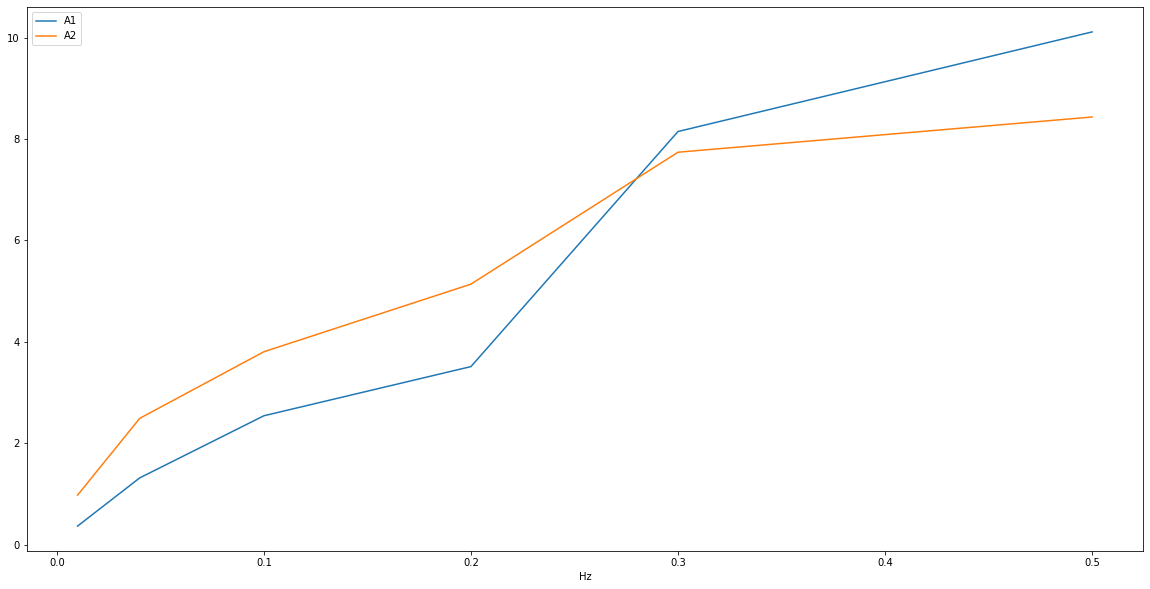

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x_f = np.array([0.5, 0.3, 0.2, 0.1, 0.04, 0.01])
A1 = np.array([10.113, 8.1484, 3.512, 2.542, 1.316, 0.366])
A2 = np.array([8.4345, 7.74, 5.138, 3.805, 2.49, 0.976 ])
plt.plot(x_f, A1, label = 'A1')
plt.plot(x_f, A2, label = 'A2')
plt.xlabel("Hz")
plt.ylabel("")
plt.legend()

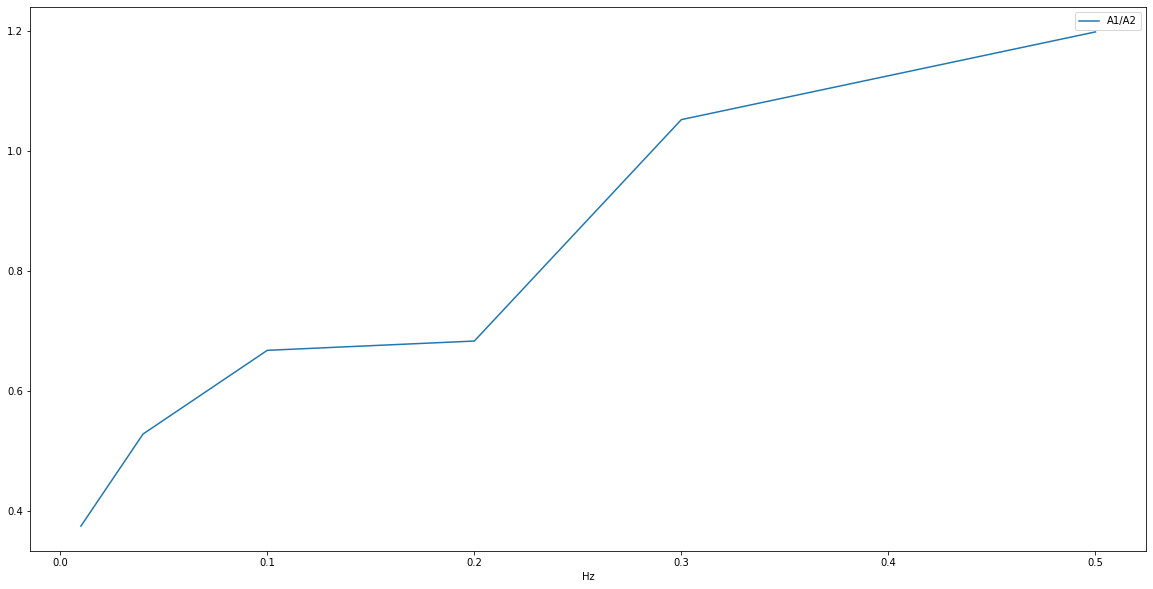

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x_f, A1/A2, label = 'A1/A2')
plt.xlabel("Hz")
plt.ylabel("")
plt.legend()

# Картинка 2.4

[3.3, 68000]
   N on_start_t on_start_V on_end_t  on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN       NaN         NaN         NaN     10.01   0.28575
1  1     10.528   0.349875    11.52    0.5315      11.545    0.503375    11.742  0.477875
2  2     11.775   0.520125   12.774     0.619      12.796      0.5985    12.991  0.562875
3  3     13.025   0.607375   14.014   0.68425      14.038    0.658875    14.235   0.62875
4  4     14.268     0.6735   15.268  0.741375       15.29     0.71725    15.486  0.684625
   N on_start_t on_start_V on_end_t  on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN       NaN         NaN         NaN    10.011  0.348125
1  1     10.527   0.391125   11.527     0.615      11.547      0.5885    12.054  0.547875
2  2     12.086     0.5925   13.082  0.701125      13.103      0.6745    13.605     0.633
3  3     13.635     0.6745    14.63  0.766625      14.651    0.739375    15.156     0.6

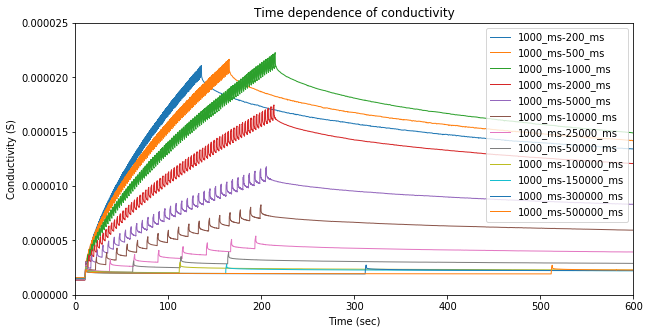

[1.2026384757656663, 1.1960766817759005, 1.2039518817581683, 1.2022227789514928, 1.1986802653156072, 1.195730517957469, 1.1887494743327143, 1.1798376952113985, 1.1719448593893163, 1.1652963300462689, 1.1562495396818544, 1.1528773666430883]


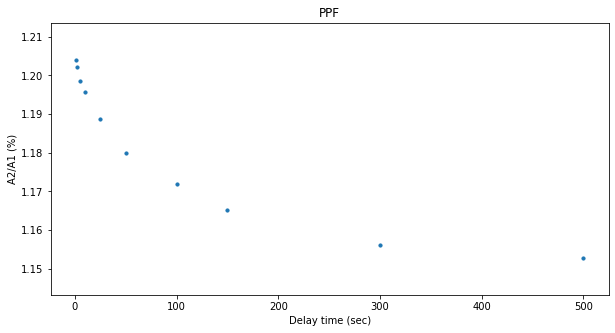

In [16]:
import neuro_lib    # Импорт своей библиотеки для работы с Neuro обработкой файлов

file_2_4 = [r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\0-2020-11_27_15-19-11.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\1-2020-11_28_03-21-26.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\2-2020-11_28_15-24-13.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\3-2020-11_29_03-27-50.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\4-2020-11_29_15-31-26.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\5-2020-11_30_03-34-57.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\6-2020-11_30_15-38-28.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\7-2020-12_01_03-42-06.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\8-2020-12_01_15-45-42.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\9-2020-12_02_03-49-15.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\10-2020-12_02_15-54-28.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\11-2020-12_03_04-04-42.txt"]


param_str = [3.3, 68000] # Параметры структуры: V(В) пит., R(Ом) доп.

[neuro_lib.replace(i) for i in file_2_4]
[neuro_lib.replace(j, '         ', '\t') for j in file_2_4]
print (param_str)

import neuro_lib_2
i = 0
res_on_off_2_4 = [neuro_lib_2.on_off_impulse(i) for i in file_2_4]
for j in range(0,3):
    print (res_on_off_2_4[j].head().to_string())
    
import pandas as pd
import numpy as np

data_2_4 = [pd.read_csv(i, header=None, sep = "\t") for i in file_2_4]
for j in range(0,3):
    print (data_2_4[j].head().to_string())
print (len(data_2_4))

import matplotlib.pyplot as plt

x_2_4 = list(data_2_4[0][0])
y_2_4 = list(data_2_4[0][1])

popravka_2_4 = [0,
            -0.00000025,
            -0.0000005,
            -0.0000005,
            -0.0000004,
            -0.0000002,
            0.00000002,
            0.0000004,
            0.00000067,
            0.0000009,
            0.000001,
            0.0000011]

for i in range(0, len(data_2_4)):
    x_2_4[i] = list(data_2_4[i][0]/1000)
    y_2_4[i] = 1/((param_str[0] - data_2_4[i][1])*param_str[1]/data_2_4[i][1]) + popravka_2_4[i]

My_lable_2_4 = ['1000_ms-200_ms',
            '1000_ms-500_ms',
            '1000_ms-1000_ms',
            '1000_ms-2000_ms',
            '1000_ms-5000_ms',
            '1000_ms-10000_ms',
            '1000_ms-25000_ms',
            '1000_ms-50000_ms',
            '1000_ms-100000_ms',
            '1000_ms-150000_ms',
            '1000_ms-300000_ms',
            '1000_ms-500000_ms'] 

plt.rcParams['figure.figsize'] = (10, 5)  # Размер картинок
plt.title("Time dependence of conductivity")
for i in range(0, len(data_2_4)):
    plt.plot(x_2_4[i], y_2_4[i] , linewidth = 1, label = My_lable_2_4[i])
plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Conductivity (S)")
plt.axis([0, 600, 0, 0.000025])

plt.show()


delay_time_2_4 = [0.2, 0.5, 1, 2, 5, 10, 25, 50, 100, 150, 300, 500]

popravka_2_4 = [0,
            -0.00000025,
            -0.0000005,
            -0.0000005,
            -0.0000004,
            -0.0000002,
            0.00000002,
            0.0000004,
            0.00000067,
            0.0000009,
            0.000001,
            0.0000011]

PPF_2_4 = list()

pop_PPF_2_4 = [0.0,0.004,-0.001,0.0025,0.002,0,0,0,-0.001,0.002,-0.004,0]
for i in range (0, len(data_2_4)):
     #PPF.append((res_on_off[i]['on_end_V'][2])/(res_on_off[i]['on_end_V'][1]))
        S1_2_4 = 1/((param_str[0] - res_on_off_2_4[i]['on_end_V'][1])*param_str[1]/res_on_off_2_4[i]['on_end_V'][1]) + popravka_2_4[i]
        S2_2_4 = 1/((param_str[0] - res_on_off_2_4[i]['on_end_V'][2])*param_str[1]/res_on_off_2_4[i]['on_end_V'][2]) + popravka_2_4[i]
        PPF_2_4.append(S2_2_4/S1_2_4 + pop_PPF_2_4[i])
print (PPF_2_4)

plt.rcParams['figure.figsize'] = (10, 5)  # Размер картинок
plt.title("PPF")
plt.plot()
plt.scatter(delay_time_2_4[2:12], PPF_2_4[2:12], s = 10)
#plt.plot(delay_time[2:12], PPF[2:12])
plt.xlabel("Delay time (sec)")
plt.ylabel("A2/A1 (%)")
#plt.axis([-5, 520, 1.15, 1.215])

plt.show()

## Результирующий график

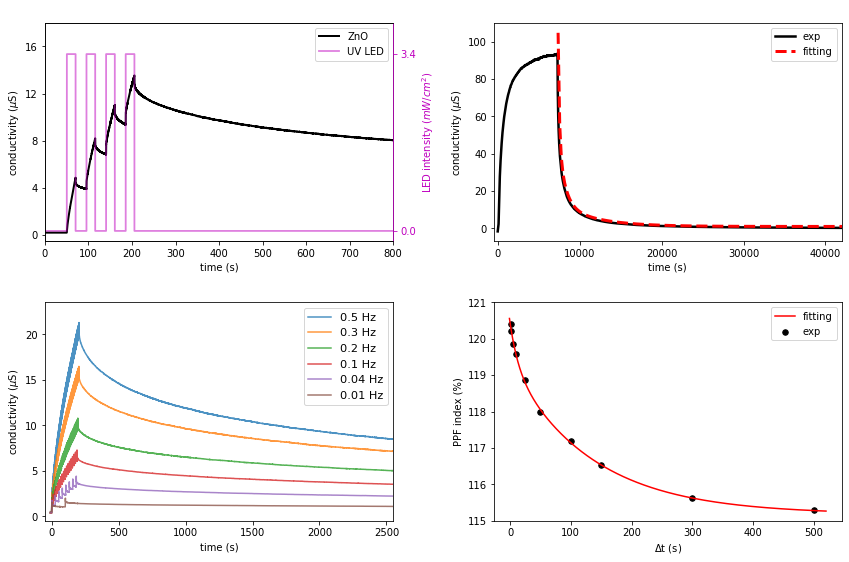

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#%matplotlib inline

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(12, 8) # размер области с графиками

# Первый график

lns1 = ax[0,0].plot(x-50, y, 'b-', color = 'k', linewidth = 2, label = 'ZnO')
ax[0,0].set_xlabel('time (s)')
ax[0,0].set_ylabel('conductivity ($\mu$S)', color='k')
ax[0,0].tick_params('y', colors='k')
#ax[0,0].set_ylim([0,20])
ax[0,0].set_ylim(top = 18, bottom = -0.55)
ax[0,0].set_yticks(np.arange(0, 20, 4))

ax2 = ax[0,0].twinx()
lns2 = ax2.plot(x_led-50, y_led/10, '-', color = 'm', alpha=0.5, linewidth = 1.8, label = 'UV LED')
ax2.set_ylabel('LED intensity ($mW/cm^2$)', color='m')
ax2.tick_params('y', colors='m')
ax2.set_xlim(0, 800)
ax2.set_ylim(top = 4, bottom = -0.2)
ax2.set_yticks(np.arange(0, 3.5, max(y_led/10)))
ax2.spines['right'].set_color('m')
ax2.set_title(' ')

lns = lns1+lns2  # легенда к графику
labs = [l.get_label() for l in lns]
ax[0,0].legend(lns, labs, loc=0)

# Второй график 

x_1 = data_2_v3_min[0]/1000
y_1_buf = 1/((param_str[0] - data_2_v3_min[1])*param_str[1]/data_2_v3_min[1])*1000000
index_max = np.argmax(y_1_buf)
yhat_1 = savgol_filter(y_1_v3[:index_max], 201, 1) # window size 51, polynomial order 3 ---- сглаживание кривой
yhat_2 = savgol_filter(y_1_v3[index_max:], 101, 5)
y_1 = np.concatenate((yhat_1,yhat_2), axis=0)

def func_exp3(x, a1, a2, a3, t1, t2, t3, c):
    return (a1*np.exp(-x/t1) + a2*np.exp(-x/t2) + a3*np.exp(-x/t3) + c)
fit_x_1 = np.array(x_1[(index_max-2000)::1000] - x_1[index_max] + 350)
fit_y_1 = func_exp3(fit_x_1, 40.7, 32.8, 12.15, 155.0, 793.3, 4347.83, 0.484)  # a1, a2, a3, t1, t2, t3, c
# exp2 y0=1.99e-6, A1=3.10e-5, A2=1.89e-5, t1=716, t2=9252
# exp3 y0=4.84e-7, A1=4.07e-5, A2=3.28e-5, A3=1.215e-5, t1=155, t2=793.3, t3=4347.83
# 19.49795722   9.85514393   5.10819458 105.97815288   1.75080458
#print (fit_x_1, '\n', fit_y_1)

# ax[0,1].plot(x_1 - x_1[index_max], y_1, color = 'k', linewidth = 2.5, label = 'exp') # устанавливает 0 на начала спада (релаксацию)
ax[0,1].plot(x_1, y_1, color = 'k', linewidth = 2.5, label = 'exp') # устанавливает 0 на начала спада (релаксацию)
ax[0,1].plot(fit_x_1 + x_1[index_max] + 150, fit_y_1 + 0.6, '--', color = 'r', linewidth = 3, label = 'fitting', alpha=0.99)
ax[0,1].set_xlim(-500, 42000) 
ax[0,1].legend(loc=0)
ax[0,1].set_xlabel('time (s)')
ax[0,1].set_ylabel('conductivity ($\mu$S)')
ax[0,1].set_title(' ')

# третий график

for i in range(0, len(data_2_3)):
    ax[1,0].plot(x_2_3[i], y_2_3[i]*1000000 , linewidth = 1.5, label = My_lable_2_3[i], alpha=0.8)
ax[1,0].legend(loc=0, prop={'size': 11.3})
ax[1,0].set_xlabel('time (s)')
ax[1,0].set_ylabel('conductivity ($\mu$S)', color='k')
ax[1,0].set_title(' ')
ax[1,0].set_xlim(-50, 2550)
ax[1,0].set_ylim(top = 23.5, bottom = -0.5)

# четвертый график

delay_time_2_4 = [0.2, 0.5, 1, 2, 5, 10, 25, 50, 100, 150, 300, 500]
PPF_2_4 = [1.2026384757656663, 
           1.1960766817759005, 
           1.2039518817581683, 
           1.2022227789514928, 
           1.1986802653156072, 
           1.195730517957469, 
           1.1887494743327143, 
           1.1798376952113985, 
           1.1719448593893163, 
           1.1652963300462689, 
           1.1562495396818544, 
           1.1528773666430883]
PPF_2_4 = [thing*100 for thing in PPF_2_4]

def func_PPF(x, a1, a2, t1, t2, c):
    return (a1*np.exp(-x/t1) + a2*np.exp(-x/t2) + c)
fit_x_PPF = np.arange(-1, 520, 0.01)
fit_y_PPF = func_PPF(fit_x_PPF, 4.12, 1.14, 134.8, 13.7, 115.18)

ax[1,1].scatter(delay_time_2_4[2:12], PPF_2_4[2:12], s = 30, color='k', label = 'exp', marker = 'o')
ax[1,1].set_xlabel('$\Delta$t (s)')
ax[1,1].set_ylabel('PPF index (%)', color='k')
ax[1,1].set_title(' ')
ax[1,1].plot(fit_x_PPF, fit_y_PPF, color='r', label = 'fitting')
ax[1,1].legend(loc=0)
#ax[1,1].set_xlim(-50, 2550)
ax[1,1].set_ylim(top = 121, bottom = 115)

matplotlib.rcParams.update({'font.size': 13})
fig.tight_layout()

# plt.show()
plt.savefig('2_v2.svg')

In [18]:
print (x_1[index_max])

7270.075


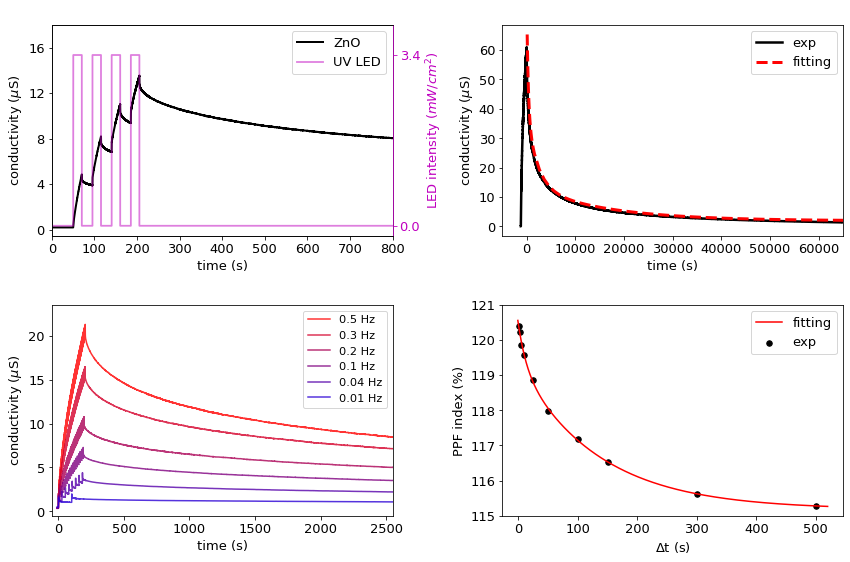

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#%matplotlib inline

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(12, 8) # размер области с графиками

# Первый график

lns1 = ax[0,0].plot(x-50, y, 'b-', color = 'k', linewidth = 2, label = 'ZnO')
ax[0,0].set_xlabel('time (s)')
ax[0,0].set_ylabel('conductivity ($\mu$S)', color='k')
ax[0,0].tick_params('y', colors='k')
#ax[0,0].set_ylim([0,20])
ax[0,0].set_ylim(top = 18, bottom = -0.55)
ax[0,0].set_yticks(np.arange(0, 20, 4))

ax2 = ax[0,0].twinx()
lns2 = ax2.plot(x_led-50, y_led/10, '-', color = 'm', alpha=0.5, linewidth = 1.8, label = 'UV LED')
ax2.set_ylabel('LED intensity ($mW/cm^2$)', color='m')
ax2.tick_params('y', colors='m')
ax2.set_xlim(0, 800)
ax2.set_ylim(top = 4, bottom = -0.2)
ax2.set_yticks(np.arange(0, 3.5, max(y_led/10)))
ax2.spines['right'].set_color('m')
ax2.set_title(' ')

lns = lns1+lns2  # легенда к графику
labs = [l.get_label() for l in lns]
ax[0,0].legend(lns, labs, loc=0)

# Второй график 

x_1 = data_2_v2_min[0]/1000
y_1 = 1/((param_str[0] - data_2_v2_min[1])*param_str[1]/data_2_v2_min[1])*1000000
index_max = np.argmax(y_1)

def func_exp3(x, a1, a2, a3, t1, t2, t3, c):
    return (a1*np.exp(-x/t1) + a2*np.exp(-x/t2) + a3*np.exp(-x/t3) + c)
fit_x_1 = np.array(x_1[(index_max-2000)::1000] - x_1[index_max] + 200)
fit_y_1 = func_exp3(fit_x_1, 12, 25, 38, 15704, 2110.5, 309, 1.5)  # a1, a2, a3, t1, t2, t3, c
# exp2 y0=1.99e-6, A1=3.10e-5, A2=1.89e-5, t1=716, t2=9252
# exp3 y0=1.4e-6, A1=1.1987e-5, A2=2.5143e-5, A3=3.807e-5, t1=15704, t2=2110.5, t3=309
# 19.49795722   9.85514393   5.10819458 105.97815288   1.75080458
#print (fit_x_1, '\n', fit_y_1)

ax[0,1].plot(x_1 - x_1[index_max], y_1, color = 'k', linewidth = 2.5, label = 'exp')
ax[0,1].plot(fit_x_1, fit_y_1 + 0.4, '--', color = 'r', linewidth = 3, label = 'fitting', alpha=0.99)
ax[0,1].set_xlim(-5000, 65000)
ax[0,1].legend(loc=0)
ax[0,1].set_xlabel('time (s)')
ax[0,1].set_ylabel('conductivity ($\mu$S)')
ax[0,1].set_title(' ')

# третий график

for i in range(0, len(data_2_3)):
    ax[1,0].plot(x_2_3[i], y_2_3[i]*1000000 , linewidth = 1.5, label = My_lable_2_3[i], alpha=0.8, color=((6-i)/6., 0, i/6.))
ax[1,0].legend(loc=0, prop={'size': 11.3})
ax[1,0].set_xlabel('time (s)')
ax[1,0].set_ylabel('conductivity ($\mu$S)', color='k')
ax[1,0].set_title(' ')
ax[1,0].set_xlim(-50, 2550)
ax[1,0].set_ylim(top = 23.5, bottom = -0.5)

# четвертый график

delay_time_2_4 = [0.2, 0.5, 1, 2, 5, 10, 25, 50, 100, 150, 300, 500]
PPF_2_4 = [1.2026384757656663, 
           1.1960766817759005, 
           1.2039518817581683, 
           1.2022227789514928, 
           1.1986802653156072, 
           1.195730517957469, 
           1.1887494743327143, 
           1.1798376952113985, 
           1.1719448593893163, 
           1.1652963300462689, 
           1.1562495396818544, 
           1.1528773666430883]
PPF_2_4 = [thing*100 for thing in PPF_2_4]

def func_PPF(x, a1, a2, t1, t2, c):
    return (a1*np.exp(-x/t1) + a2*np.exp(-x/t2) + c)
fit_x_PPF = np.arange(-1, 520, 0.01)
fit_y_PPF = func_PPF(fit_x_PPF, 4.12, 1.14, 134.8, 13.7, 115.18)

ax[1,1].scatter(delay_time_2_4[2:12], PPF_2_4[2:12], s = 30, color='k', label = 'exp', marker = 'o')
ax[1,1].set_xlabel('$\Delta$t (s)')
ax[1,1].set_ylabel('PPF index (%)', color='k')
ax[1,1].set_title(' ')
ax[1,1].plot(fit_x_PPF, fit_y_PPF, color='r', label = 'fitting')
ax[1,1].legend(loc=0)
#ax[1,1].set_xlim(-50, 2550)
ax[1,1].set_ylim(top = 121, bottom = 115)

matplotlib.rcParams.update({'font.size': 13})
fig.tight_layout()

# plt.show()
plt.savefig('2_v3.svg')

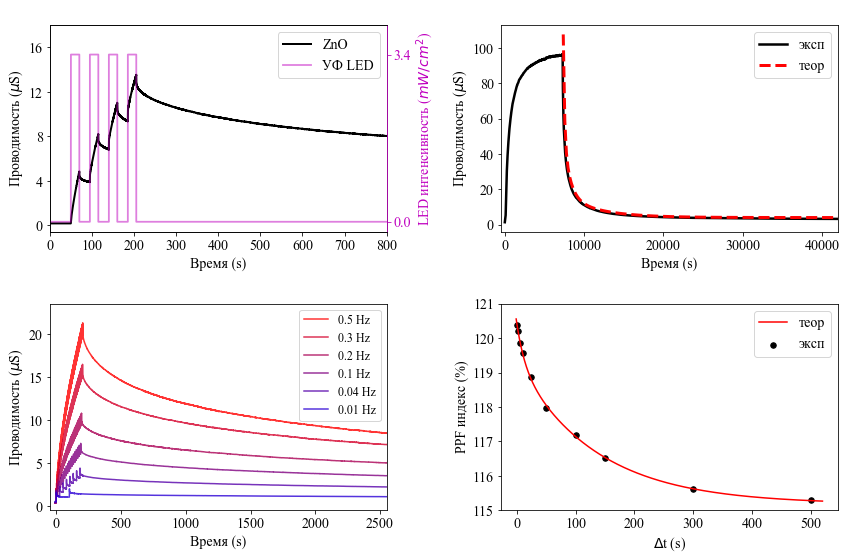

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#%matplotlib inline
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')  # выставление правильного шрифта

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(12, 8) # размер области с графиками

# Первый график

lns1 = ax[0,0].plot(x-50, y, 'b-', color = 'k', linewidth = 2, label = 'ZnO')
ax[0,0].set_xlabel('Время (s)')
ax[0,0].set_ylabel('Проводимость ($\mu$S)', color='k')
ax[0,0].tick_params('y', colors='k')
#ax[0,0].set_ylim([0,20])
ax[0,0].set_ylim(top = 18, bottom = -0.55)
ax[0,0].set_yticks(np.arange(0, 20, 4))

ax2 = ax[0,0].twinx()
lns2 = ax2.plot(x_led-50, y_led/10, '-', color = 'm', alpha=0.5, linewidth = 1.8, label = 'УФ LED')
ax2.set_ylabel('LED интенсивность ($mW/cm^2$)', color='m')
ax2.tick_params('y', colors='m')
ax2.set_xlim(0, 800)
ax2.set_ylim(top = 4, bottom = -0.2)
ax2.set_yticks(np.arange(0, 3.5, max(y_led/10)))
ax2.spines['right'].set_color('m')
ax2.set_title(' ')

lns = lns1+lns2  # легенда к графику
labs = [l.get_label() for l in lns]
ax[0,0].legend(lns, labs, loc=0, prop={'size': 14})

# Второй график 

x_1 = data_2_v3_min[0]/1000
y_1_buf = 1/((param_str[0] - data_2_v3_min[1])*param_str[1]/data_2_v3_min[1])*1000000
index_max = np.argmax(y_1_buf)
yhat_1 = savgol_filter(y_1_v3[:index_max], 201, 1) # window size 51, polynomial order 3 ---- сглаживание кривой
yhat_2 = savgol_filter(y_1_v3[index_max:], 101, 5)
y_1 = np.concatenate((yhat_1,yhat_2), axis=0)

def func_exp3(x, a1, a2, a3, t1, t2, t3, c):
    return (a1*np.exp(-x/t1) + a2*np.exp(-x/t2) + a3*np.exp(-x/t3) + c)
fit_x_1 = np.array(x_1[(index_max-2000)::1000] - x_1[index_max] + 350)
fit_y_1 = func_exp3(fit_x_1, 40.7, 32.8, 12.15, 155.0, 793.3, 4347.83, 0.484)  # a1, a2, a3, t1, t2, t3, c
# exp2 y0=1.99e-6, A1=3.10e-5, A2=1.89e-5, t1=716, t2=9252
# exp3 y0=4.84e-7, A1=4.07e-5, A2=3.28e-5, A3=1.215e-5, t1=155, t2=793.3, t3=4347.83
# 19.49795722   9.85514393   5.10819458 105.97815288   1.75080458
#print (fit_x_1, '\n', fit_y_1)

# ax[0,1].plot(x_1 - x_1[index_max], y_1, color = 'k', linewidth = 2.5, label = 'exp') # устанавливает 0 на начала спада (релаксацию)
ax[0,1].plot(x_1, y_1 + 3, color = 'k', linewidth = 2.5, label = 'эксп') # устанавливает 0 на начала спада (релаксацию)
ax[0,1].plot(fit_x_1 + x_1[index_max] + 150, fit_y_1 + 0.6 + 3, '--', color = 'r', linewidth = 3, label = 'теор', alpha=0.99)
ax[0,1].set_xlim(-500, 42000) 
ax[0,1].legend(loc=0, prop={'size': 14})
ax[0,1].set_xlabel('Время (s)')
ax[0,1].set_ylabel('Проводимость ($\mu$S)')
ax[0,1].set_title(' ')

# третий график

for i in range(0, len(data_2_3)):
    ax[1,0].plot(x_2_3[i], y_2_3[i]*1000000 , linewidth = 1.5, label = My_lable_2_3[i], alpha=0.8, color=((6-i)/6., 0, i/6.))
ax[1,0].legend(loc=0, prop={'size': 12})
ax[1,0].set_xlabel('Время (s)')
ax[1,0].set_ylabel('Проводимость ($\mu$S)', color='k')
ax[1,0].set_title(' ')
ax[1,0].set_xlim(-50, 2550)
ax[1,0].set_ylim(top = 23.5, bottom = -0.5)

# четвертый график

delay_time_2_4 = [0.2, 0.5, 1, 2, 5, 10, 25, 50, 100, 150, 300, 500]
PPF_2_4 = [1.2026384757656663, 
           1.1960766817759005, 
           1.2039518817581683, 
           1.2022227789514928, 
           1.1986802653156072, 
           1.195730517957469, 
           1.1887494743327143, 
           1.1798376952113985, 
           1.1719448593893163, 
           1.1652963300462689, 
           1.1562495396818544, 
           1.1528773666430883]
PPF_2_4 = [thing*100 for thing in PPF_2_4]

def func_PPF(x, a1, a2, t1, t2, c):
    return (a1*np.exp(-x/t1) + a2*np.exp(-x/t2) + c)
fit_x_PPF = np.arange(-1, 520, 0.01)
fit_y_PPF = func_PPF(fit_x_PPF, 4.12, 1.14, 134.8, 13.7, 115.18)

ax[1,1].scatter(delay_time_2_4[2:12], PPF_2_4[2:12], s = 30, color='k', label = 'эксп', marker = 'o')
ax[1,1].set_xlabel('$\Delta$t (s)')
ax[1,1].set_ylabel('PPF индекс (%)', color='k')
ax[1,1].set_title(' ')
ax[1,1].plot(fit_x_PPF, fit_y_PPF, color='r', label = 'теор')
ax[1,1].legend(loc=0, prop={'size': 14})
#ax[1,1].set_xlim(-50, 2550)
ax[1,1].set_ylim(top = 121, bottom = 115)

matplotlib.rcParams.update({'font.size': 14})
fig.tight_layout()

# plt.show()
plt.savefig('2_v5.svg')